Data Source: http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import re

In [2]:
filename = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [3]:
heartdisease = []

for path in filename:
    tempdf = pd.read_csv('../data/' + path, names=colnames)
    tempname = re.findall(r'\.([a-z]*)\.',path)[0]
    tempdf['location'] = tempname
    heartdisease.append(tempdf)

heartdf = pd.concat(heartdisease)

In [4]:
heartdf['sex'] = heartdf['sex'].apply(lambda value: 'male' if value == 1 else 'female')

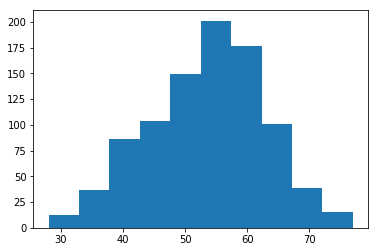

In [5]:
fig,ax = plt.subplots()

plt.hist(heartdf['age'])
plt.show()

data has a normal distribution

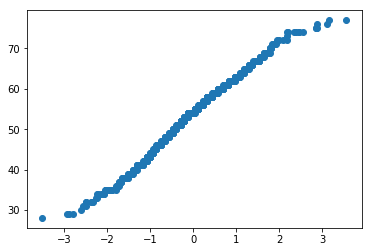

In [6]:
norm = np.random.normal(0,1,heartdf['age'].count())
norm.sort()
normcheck = np.array(heartdf['age'].astype(int).sort_values())
plt.plot(norm,normcheck,"o")
plt.show()

data has a normal distribution

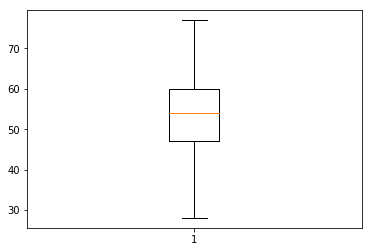

In [7]:
plt.boxplot(heartdf['age'])
plt.show()

quartile ranges are between ~27 and ~75. Median is around 55.

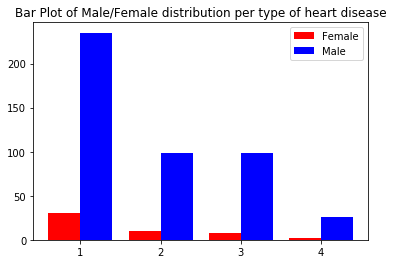

In [8]:
fig,ax = plt.subplots()

for i in range(1,5):
    ax.bar(i, heartdf['sex'][(heartdf['sex'] == 'female') & (heartdf['num']==i)].count(), width=0.4, color='r')
    ax.bar(i+(.4), heartdf['sex'][(heartdf['sex'] == 'male') & (heartdf['num']==i)].count(), width=0.4, color='b')
plt.title('Bar Plot of Male/Female distribution per type of heart disease')
plt.legend(['Female','Male'])
plt.xticks([1.2,2.2,3.2,4.2], ['1','2','3','4'], rotation='horizontal')
plt.show()

Seems like the ratio of men to women per heart disease category is fairly even.

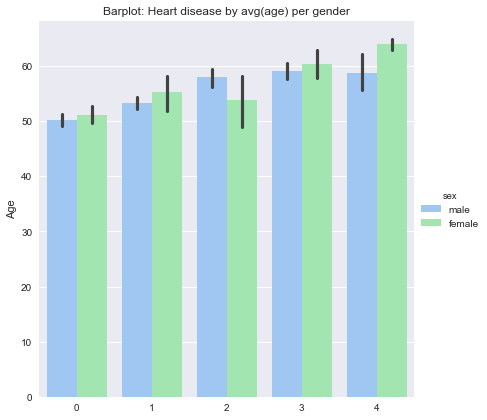

In [9]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x='num', y='age', hue="sex", data=heartdf,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Barplot: Heart disease by avg(age) per gender')
plt.show()

As heart disease categories increase in severity, so does the average age for men and women

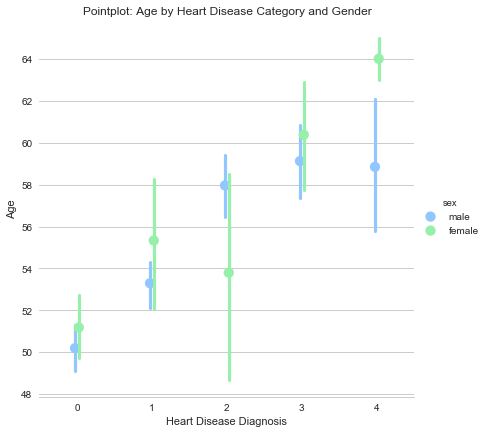

In [17]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="num", y="age", hue="sex", data=heartdf,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("Heart Disease Diagnosis")
plt.title('Pointplot: Age by Heart Disease Category and Gender')
plt.show()

Similar to the above bar plot except that it shows the ranges

In [18]:
nheartdf = heartdf.loc[(heartdf['chol'] != '?')].copy()
nheartdf['chol'] = nheartdf['chol'].astype(int)

nheartdf = nheartdf.loc[nheartdf['chol'] != 0]

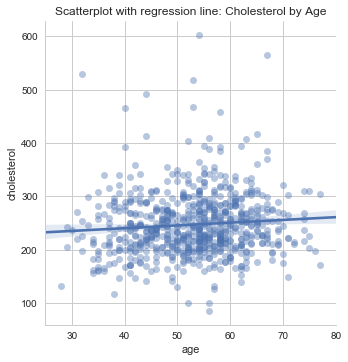

In [19]:
g = sns.lmplot(y='chol', 
               x='age',
               data=nheartdf, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("cholesterol")
g.set_xlabels("age")
plt.title('Scatterplot with regression line: Cholesterol by Age')
plt.show()

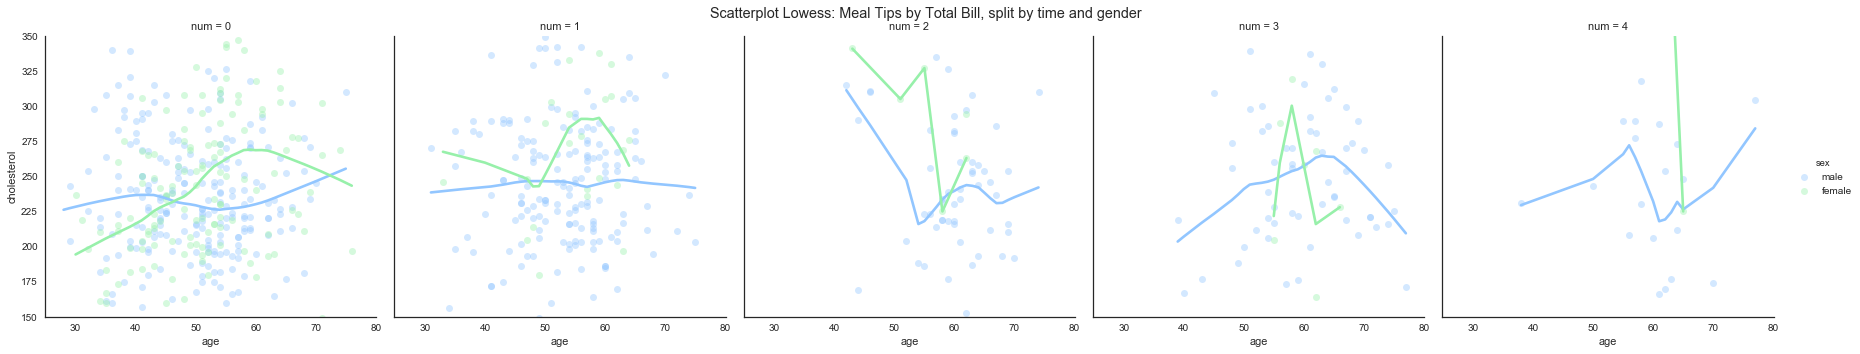

In [20]:
# Setting the overall aesthetic.
sns.set(style="white")


g = sns.lmplot(y='chol', 
               x='age',
               hue='sex',
               data=nheartdf, # Data.
               col='num',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("cholesterol")
g.set_xlabels("age")
plt.ylim(150,350)
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()

The cholesterol levels seem more erratic at higher heart disease categories but sample size is also decreasing.